In [9]:
# Import necessary libraries
import pandas as pd,numpy as np,seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [10]:
#load data set
housing_chennai = pd.read_csv('Chennai.csv')

In [11]:
housing_chennai.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [12]:
housing_chennai.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [13]:
housing_chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                5014 non-null   int64 
 1   Area                 5014 non-null   int64 
 2   Location             5014 non-null   object
 3   No. of Bedrooms      5014 non-null   int64 
 4   Resale               5014 non-null   int64 
 5   MaintenanceStaff     5014 non-null   int64 
 6   Gymnasium            5014 non-null   int64 
 7   SwimmingPool         5014 non-null   int64 
 8   LandscapedGardens    5014 non-null   int64 
 9   JoggingTrack         5014 non-null   int64 
 10  RainWaterHarvesting  5014 non-null   int64 
 11  IndoorGames          5014 non-null   int64 
 12  ShoppingMall         5014 non-null   int64 
 13  Intercom             5014 non-null   int64 
 14  SportsFacility       5014 non-null   int64 
 15  ATM                  5014 non-null   int64 
 16  ClubHo

In [14]:
housing_chennai.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,5.014000e+03,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,...,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
mean,8.731264e+06,1232.992022,2.362984,0.097128,5.000997,5.213602,5.160949,5.114878,5.123055,5.115277,...,5.264260,4.999402,5.068010,4.997208,4.991823,5.009174,5.011767,4.998404,4.991823,5.009174
std,1.034261e+07,641.841841,0.705252,0.296162,4.464256,4.239118,4.296954,4.346406,4.337706,4.345983,...,4.182092,4.465864,4.395648,4.468074,4.473489,4.455995,4.453369,4.466869,4.473489,4.455995
min,2.000000e+06,362.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.095000e+06,865.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.782000e+06,1067.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,8.675000e+06,1438.750000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,1.900000e+08,7240.000000,5.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


## Checking for Null Values

In [15]:
housing_chennai.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


## Checking Outliers

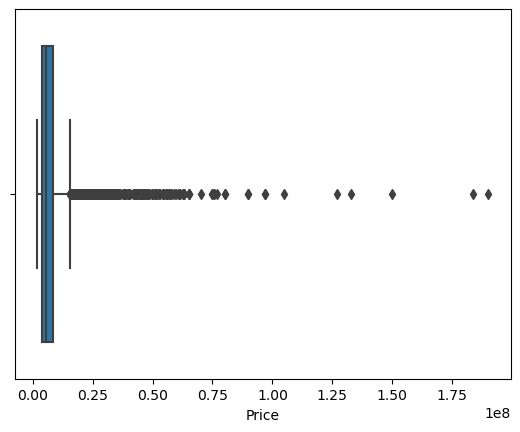

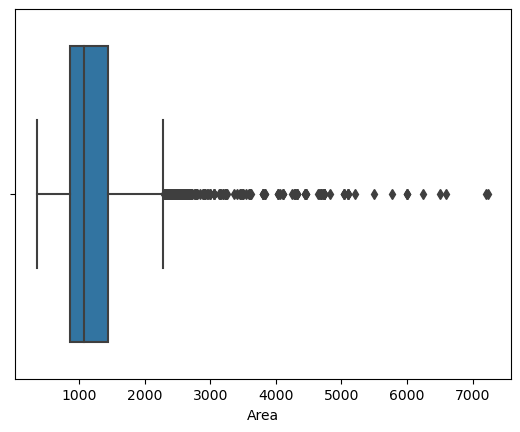

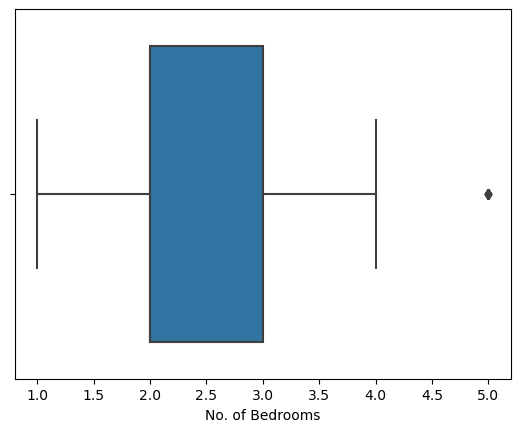

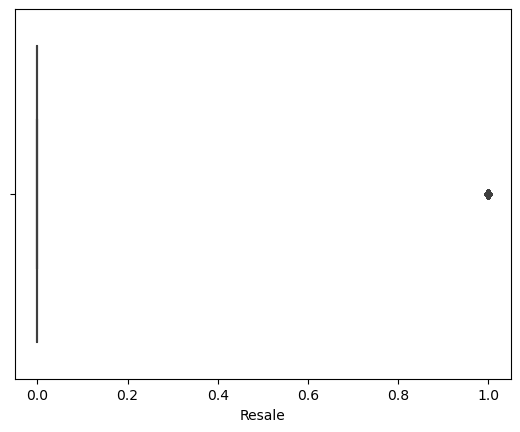

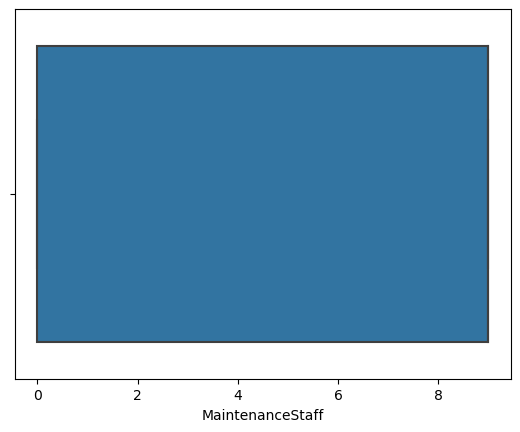

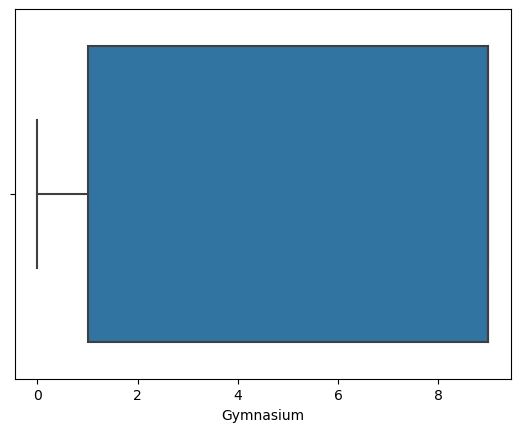

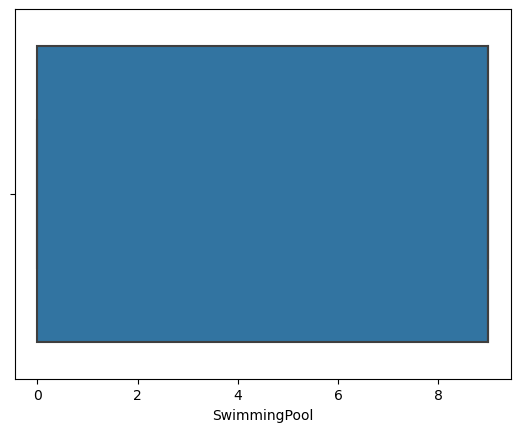

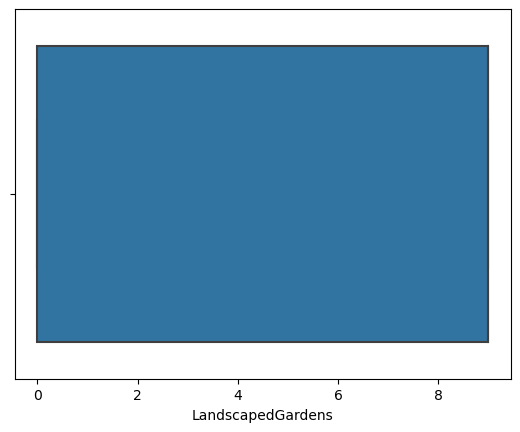

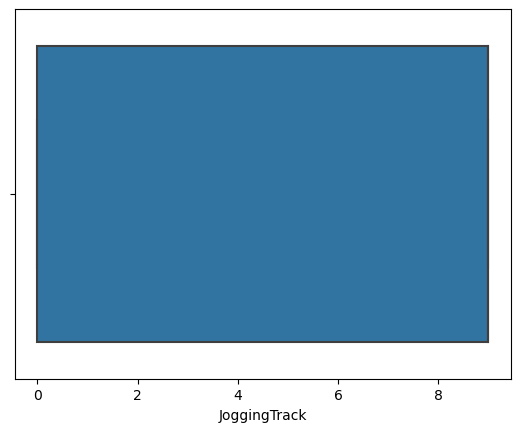

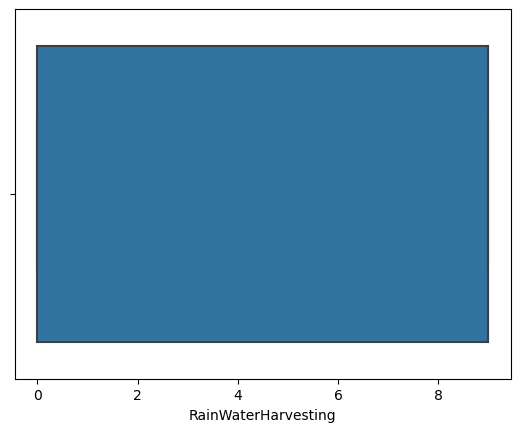

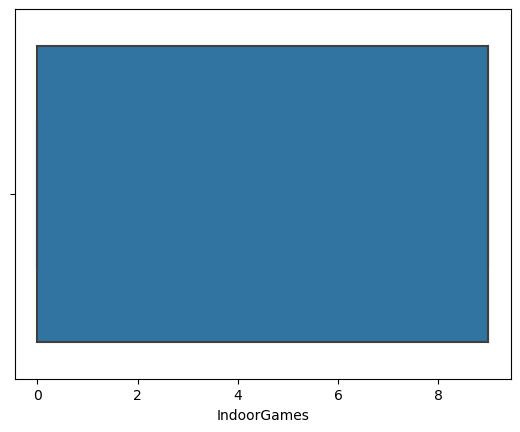

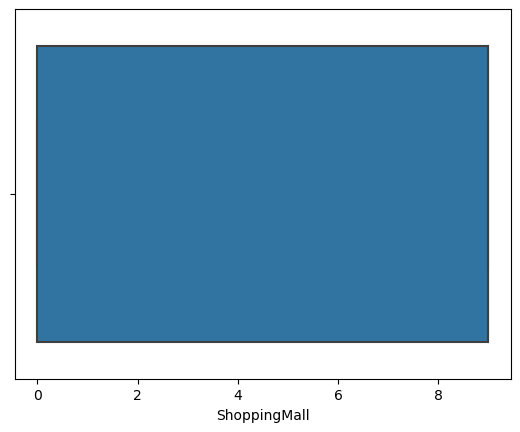

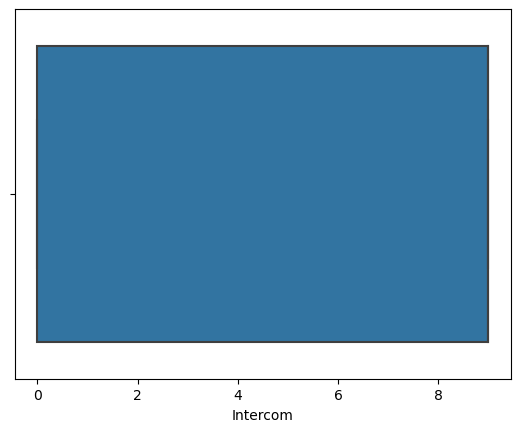

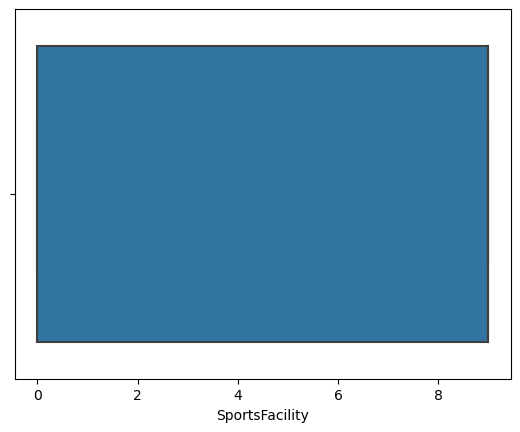

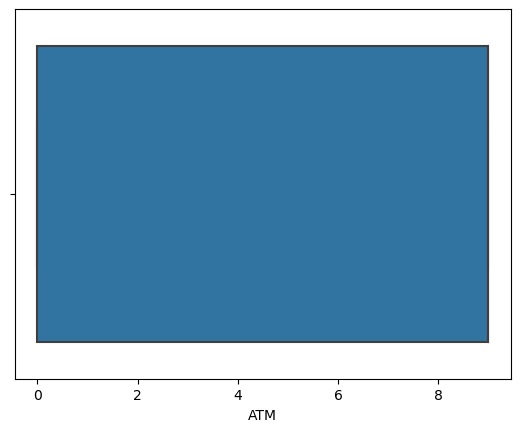

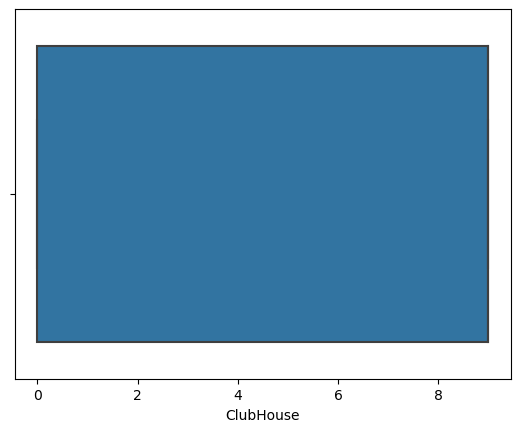

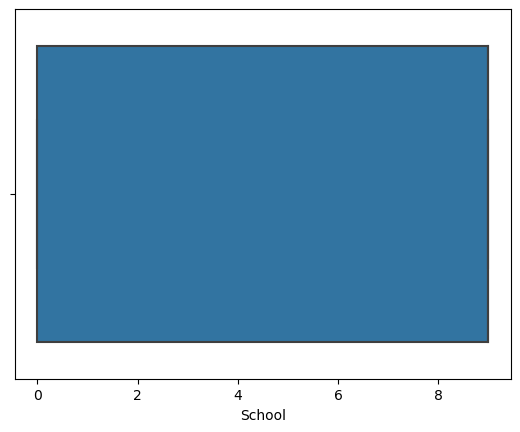

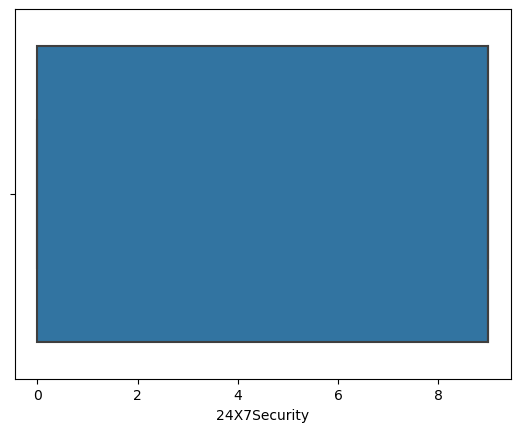

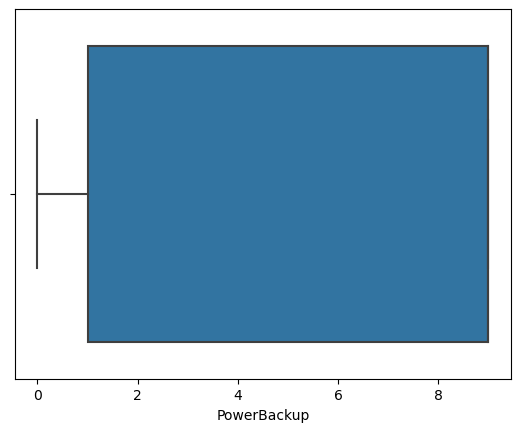

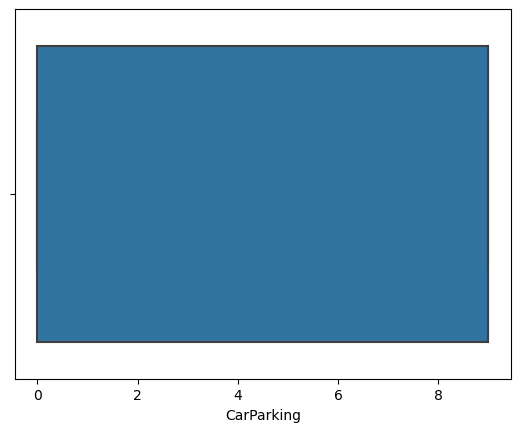

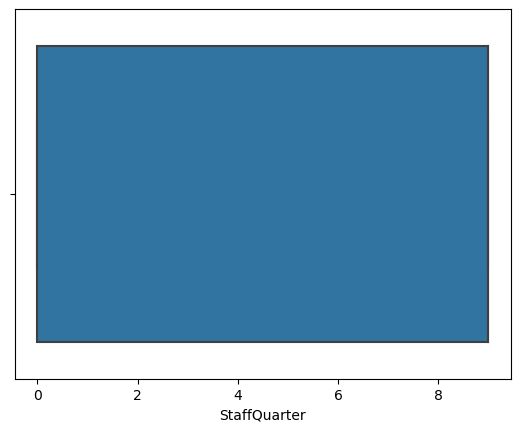

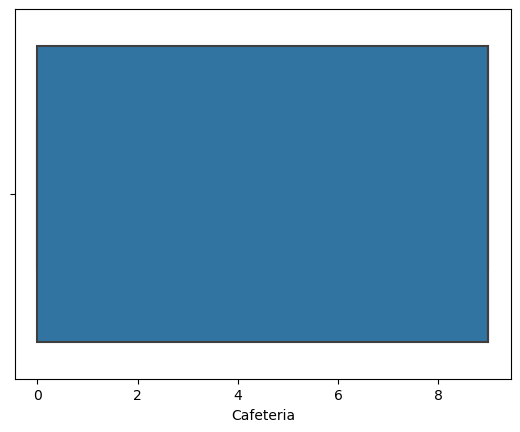

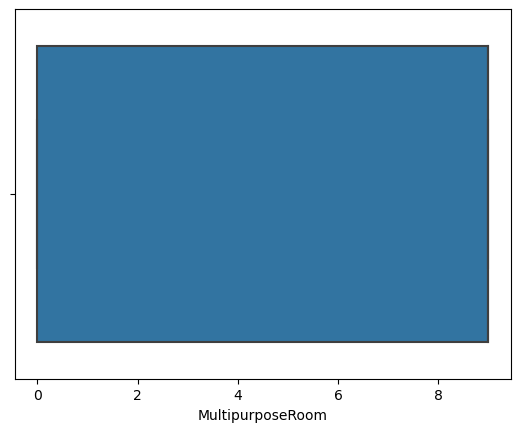

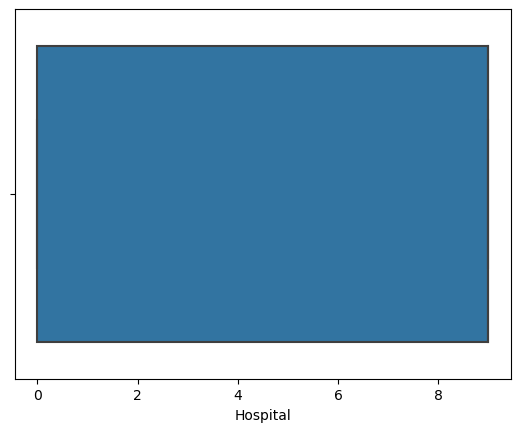

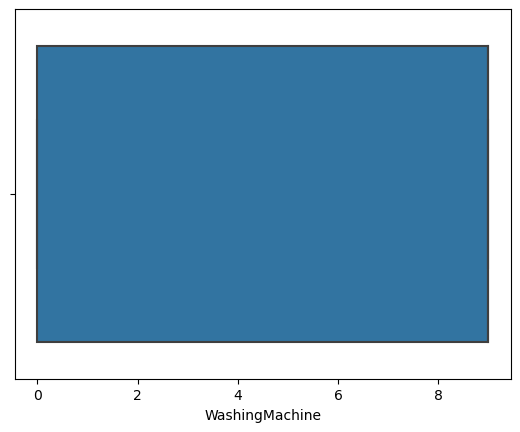

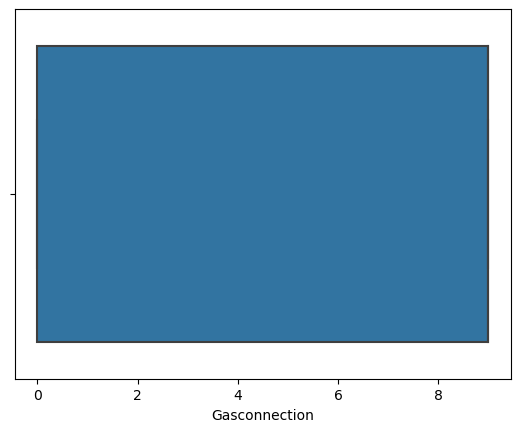

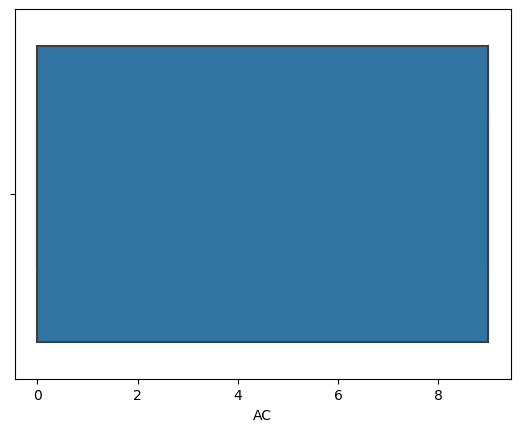

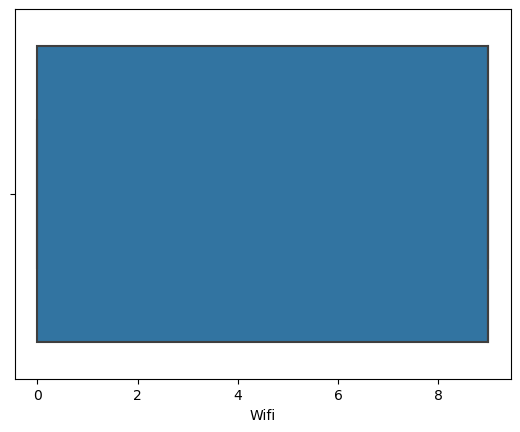

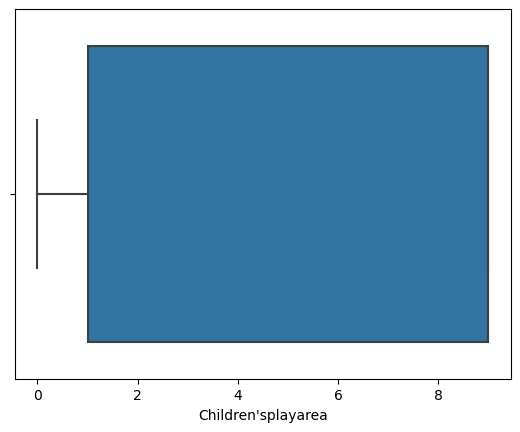

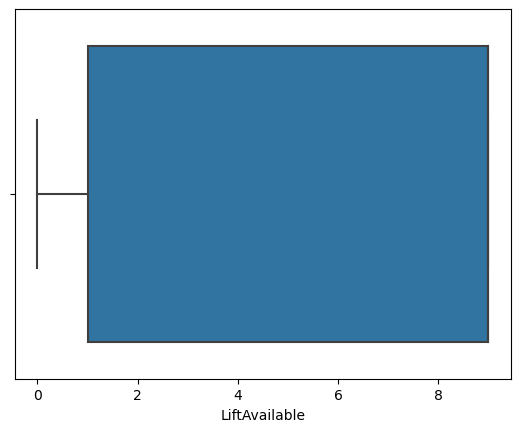

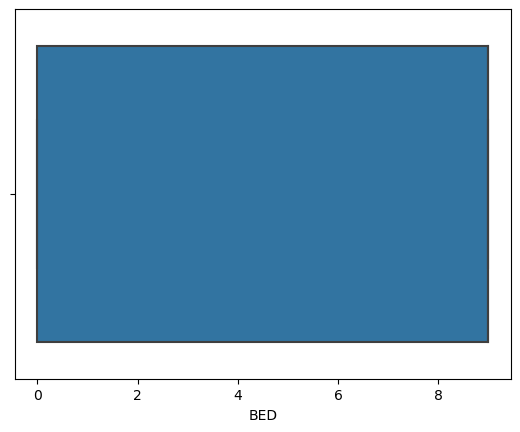

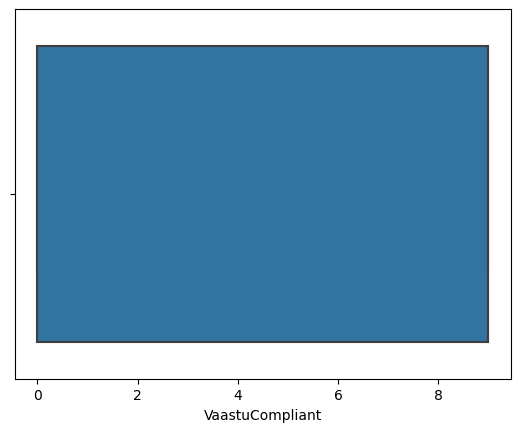

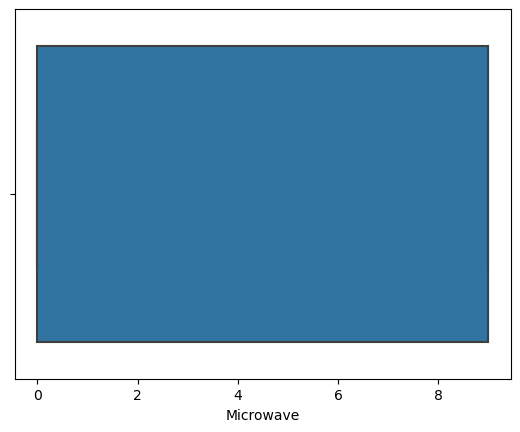

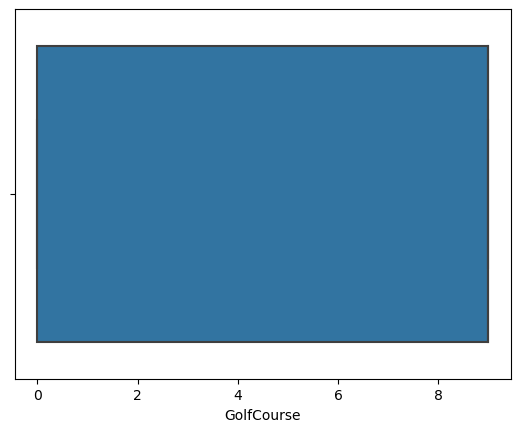

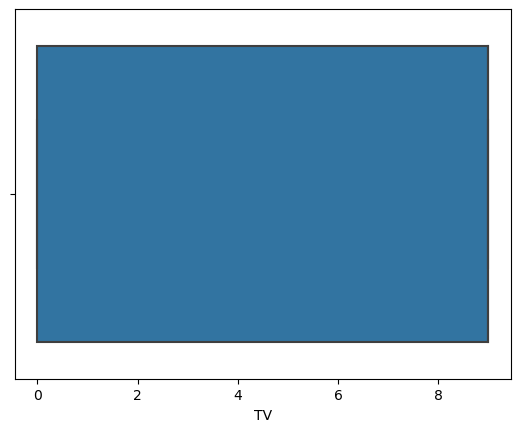

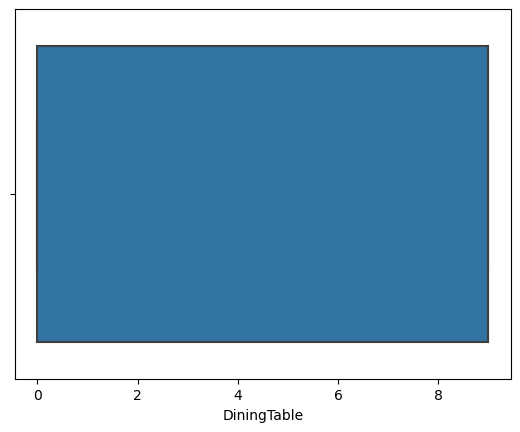

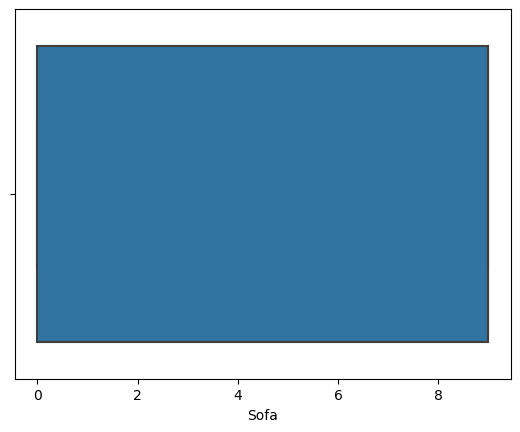

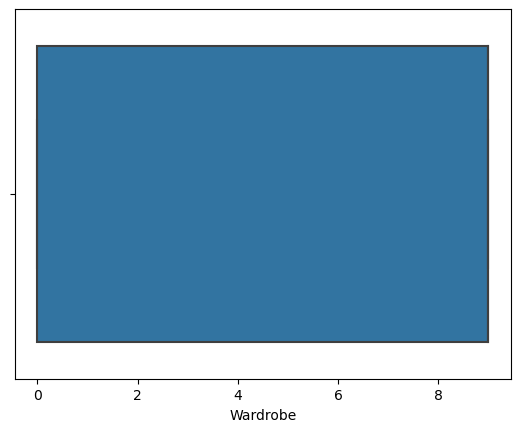

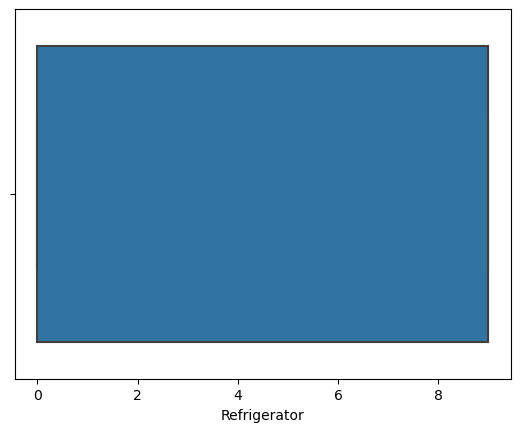

In [16]:
for i in housing_chennai.columns:
    if housing_chennai[i].dtype != 'object':
        sns.boxplot(data=housing_chennai,x=i)
        plt.show()

# removing outliers

In [17]:
housing_chennai.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [21]:
out_list= ['Area','No. of Bedrooms','Resale']

In [22]:
for col in out_list:
    
    Q1 = housing_chennai[col].quantile(0.25)
    Q3 = housing_chennai[col].quantile(0.75)
    
    IQR = Q3-Q1
    
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    
    df = housing_chennai[(housing_chennai[col]>LL) & (housing_chennai[col]<UL)]


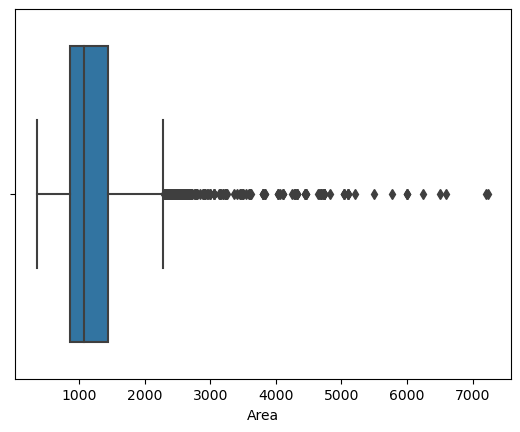

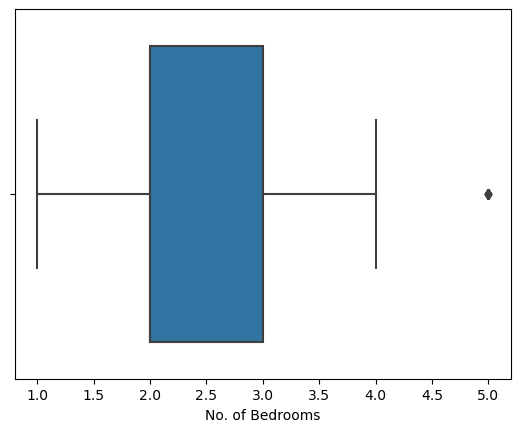

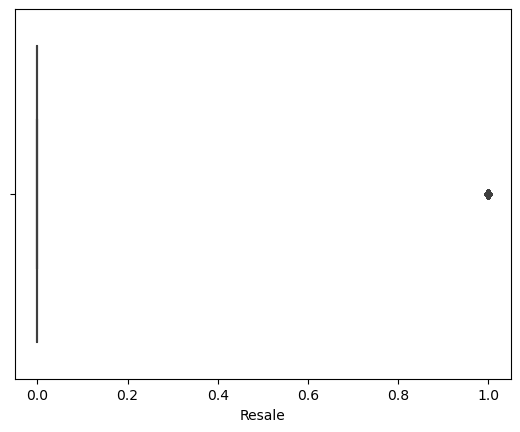

In [23]:
for col in out_list:
    
    sns.boxplot(data=housing_chennai, x=col)
    plt.show()